# [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

Here is the complete translation of the variable names and their descriptions into Croatian:

1. **SalePrice** - Prodajna cijena nekretnine u dolarima. Ovo je ciljna varijabla koju pokušavate predvidjeti.
2. **MSSubClass** - Klasa zgrade.
3. **MSZoning** - Opća klasifikacija zone.
4. **LotFrontage** - Linearni metri ulice povezani s nekretninom.
5. **LotArea** - Površina parcele u kvadratnim stopama.
6. **Street** - Vrsta pristupa cesti.
7. **Alley** - Vrsta pristupa preko staze.
8. **LotShape** - Opći oblik parcele.
9. **LandContour** - Ravnoteža terena.
10. **Utilities** - Vrste dostupnih komunalnih usluga.
11. **LotConfig** - Konfiguracija parcele.
12. **LandSlope** - Nagib terena.
13. **Neighborhood** - Fizičke lokacije unutar gradskih granica Amesa.
14. **Condition1** - Blizina glavne ceste ili željeznice.
15. **Condition2** - Blizina glavne ceste ili željeznice (ako postoji druga).
16. **BldgType** - Vrsta stambene zgrade.
17. **HouseStyle** - Stil stambene zgrade.
18. **OverallQual** - Ukupna kvaliteta materijala i završne obrade.
19. **OverallCond** - Ukupna ocjena stanja.
20. **YearBuilt** - Datum izgradnje.
21. **YearRemodAdd** - Datum preuređenja.
22. **RoofStyle** - Vrsta krova.
23. **RoofMatl** - Materijal krova.
24. **Exterior1st** - Vanjska obloga na kući.
25. **Exterior2nd** - Vanjska obloga na kući (ako postoji više od jednog materijala).
26. **MasVnrType** - Vrsta opeke od opeke.
27. **MasVnrArea** - Površina opeke od opeke u kvadratnim stopama.
28. **ExterQual** - Kvaliteta vanjskih materijala.
29. **ExterCond** - Trenutno stanje materijala na vanjštini.
30. **Foundation** - Vrsta temelja.
31. **BsmtQual** - Visina podruma.
32. **BsmtCond** - Opće stanje podruma.
33. **BsmtExposure** - Podrum s izlazom na vrt ili razinu vrta.
34. **BsmtFinType1** - Kvaliteta završene površine podruma.
35. **BsmtFinSF1** - Kvadratne stope završene površine tipa 1.
36. **BsmtFinType2** - Kvaliteta druge završene površine (ako postoji).
37. **BsmtFinSF2** - Kvadratne stope završene površine tipa 2.
38. **BsmtUnfSF** - Nezavršene kvadratne stope podrumskog prostora.
39. **TotalBsmtSF** - Ukupne kvadratne stope podrumskog prostora.
40. **Heating** - Vrsta grijanja.
41. **HeatingQC** - Kvaliteta i stanje grijanja.
42. **CentralAir** - Centralna klimatizacija.
43. **Electrical** - Električni sustav.
44. **1stFlrSF** - Kvadratne stope prvog kata.
45. **2ndFlrSF** - Kvadratne stope drugog kata.
46. **LowQualFinSF** - Kvadratne stope završene niskokvalitetne površine (svi katovi).
47. **GrLivArea** - Stambena površina iznad zemlje u kvadratnim stopama.
48. **BsmtFullBath** - Cijele kupaonice u podrumu.
49. **BsmtHalfBath** - Polukupaonice u podrumu.
50. **FullBath** - Cijele kupaonice iznad zemlje.
51. **HalfBath** - Polukupaonice iznad zemlje.
52. **Bedroom** - Broj spavaćih soba iznad podruma.
53. **Kitchen** - Broj kuhinja.
54. **KitchenQual** - Kvaliteta kuhinje.
55. **TotRmsAbvGrd** - Ukupan broj soba iznad zemlje (ne uključujući kupaonice).
56. **Functional** - Ocena funkcionalnosti doma.
57. **Fireplaces** - Broj kaminâ.
58. **FireplaceQu** - Kvaliteta kamina.
59. **GarageType** - Lokacija garaže.
60. **GarageYrBlt** - Godina izgradnje garaže.
61. **GarageFinish** - Unutarnji završetak garaže.
62. **GarageCars** - Kapacitet garaže u broju automobila.
63. **GarageArea** - Površina garaže u kvadratnim stopama.
64. **GarageQual** - Kvaliteta garaže.
65. **GarageCond** - Stanje garaže.
66. **PavedDrive** - Popločani prilaz.
67. **WoodDeckSF** - Površina drvenog trijema u kvadratnim stopama.
68. **OpenPorchSF** - Površina otvorenog trijema u kvadratnim stopama.
69. **EnclosedPorch** - Površina zatvorenog trijema u kvadratnim stopama.
70. **3SsnPorch** - Trijem za tri sezone u kvadratnim stopama.
71. **ScreenPorch** - Trijem sa zaštitnom mrežom u kvadratnim stopama.
72. **PoolArea** - Površina bazena u kvadratnim stopama.
73. **PoolQC** - Kvaliteta bazena.
74. **Fence** - Kvaliteta ograde.
75. **MiscFeature** - Razne značajke koje nisu pokrivene u drugim kategorijama.
76. **MiscVal** - Vrijednost raznih značajki.
77. **MoSold** - Mjesec prodaje.
78. **YrSold** - Godina prodaje.
79. **SaleType** - Vrsta prodaje.
80. **SaleCondition** - Stanje prodaje.

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import (f_oneway,
                         norm, skew,
                         chi2_contingency)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError

In [37]:
df = pd.read_csv('https://raw.githubusercontent.com/dsabljic/datasets/master/real_estate1_train.csv')
df.drop('Id', axis=1, inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [38]:
df.shape

(1460, 80)

In [39]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [41]:
pd.set_option('display.max_columns', None)
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [42]:
numerical_columns = df.select_dtypes(include=['number'])
categorical_columns = df.select_dtypes(include=['object'])

In [43]:
print(f'Broj numerickih varijabli: {len(numerical_columns.columns)}')
print(f'Broj kategorickih varijabli: {len(categorical_columns.columns)}')

Broj numerickih varijabli: 37
Broj kategorickih varijabli: 43


## Znacajnost varijabli

In [44]:
def highly_correlated(correlation_matrix, target_variable, threshold):

    relevant_features = correlation_matrix[target_variable].apply(abs)
    high_corr_features = relevant_features[relevant_features > threshold].index.tolist()

    high_corr_features.remove(target_variable)

    return high_corr_features

correlation_matrix = numerical_columns.corr()
correlated_vars = highly_correlated(correlation_matrix, 'SalePrice', .3)
correlated_vars

['LotFrontage',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

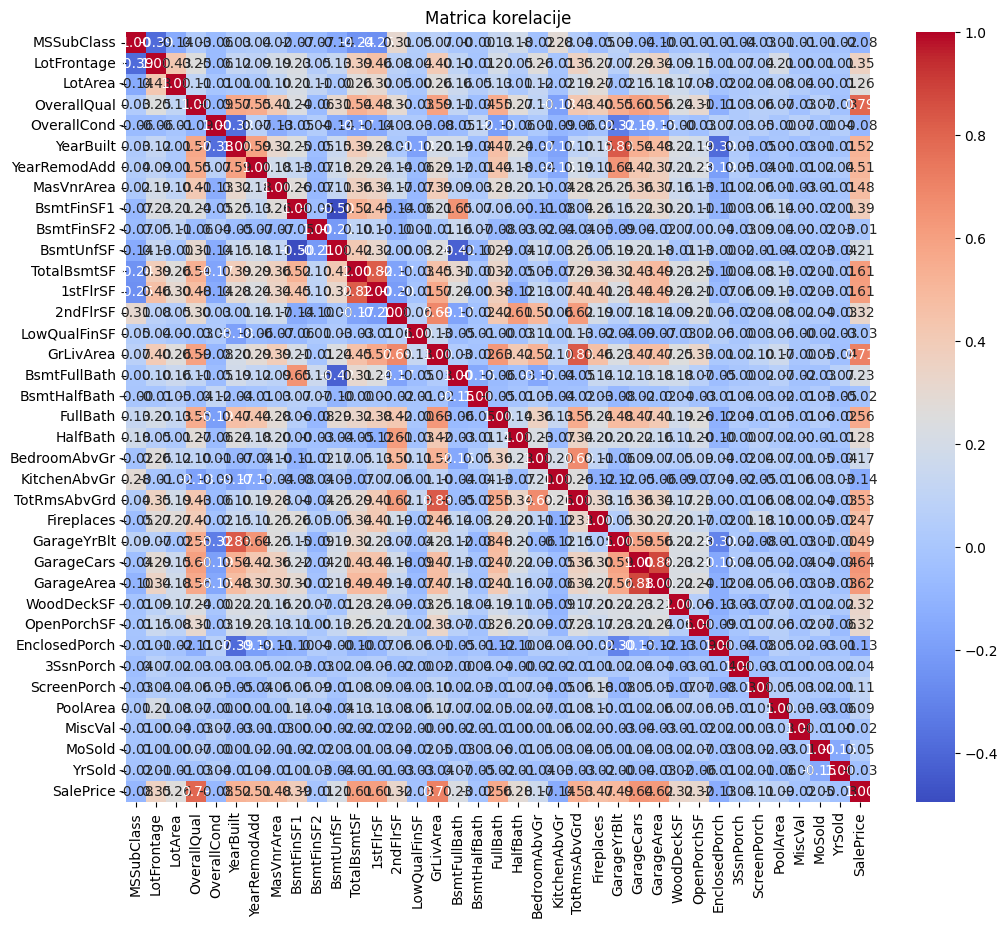

In [45]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrica korelacije')
plt.show()

In [46]:
categorical_columns_list = categorical_columns.columns.tolist()

anova_results = {}
for col in categorical_columns_list:
    groups = df.groupby(col)['SalePrice'].apply(list)
    f_val, p_val = f_oneway(*groups)
    anova_results[col] = {'F-Value': f_val, 'p-Value': p_val}

anova_df = pd.DataFrame(anova_results).T
anova_df = anova_df.sort_values(by='p-Value')

significant_categoricals = anova_df[anova_df['p-Value'] < 0.05]
significant_categoricals_list = significant_categoricals.index.tolist()

In [47]:
significant_categoricals

,F-Value,p-Value
Neighborhood,71.784865,1.558600e-225
ExterQual,443.334831,1.439551e-204
KitchenQual,407.806352,3.032213e-192
BsmtQual,392.913506,9.610615e-186
GarageFinish,250.962467,1.199117e-93
Foundation,100.253851,5.791895e-91
HeatingQC,88.394462,2.667062e-67
GarageType,71.522123,1.247154e-66
BsmtFinType1,67.602175,1.807731e-63
SaleCondition,45.578428,7.988268e-44


## Distribucije

In [48]:
def plot_numerical_distributions(df, numerical_columns, filename=None, n_cols = 3):
    num_rows = np.ceil(len(numerical_columns) / n_cols).astype(int)

    plt.figure(figsize=(20, 5 * num_rows))

    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(num_rows, n_cols, i)
        sns.histplot(df[col], kde=False, color='blue', bins=30)

        median_val = df[col].median()
        mean_val = df[col].mean()
        skewness_val = skew(df[col].dropna())

        plt.axvline(median_val, color='red', linestyle='--', label='Median')
        plt.axvline(mean_val, color='green', linestyle='-', label='Mean')

        plt.title(f'Histogram of {col}')
        plt.xlabel(f'Median: {median_val}, Mean: {mean_val}, Skewness: {skewness_val:.2f}')
        plt.ylabel('Frequency')
        plt.legend()

    plt.tight_layout()

    if filename:
        plt.savefig(filename)
        plt.close()
        return filename
    else:
        plt.show()

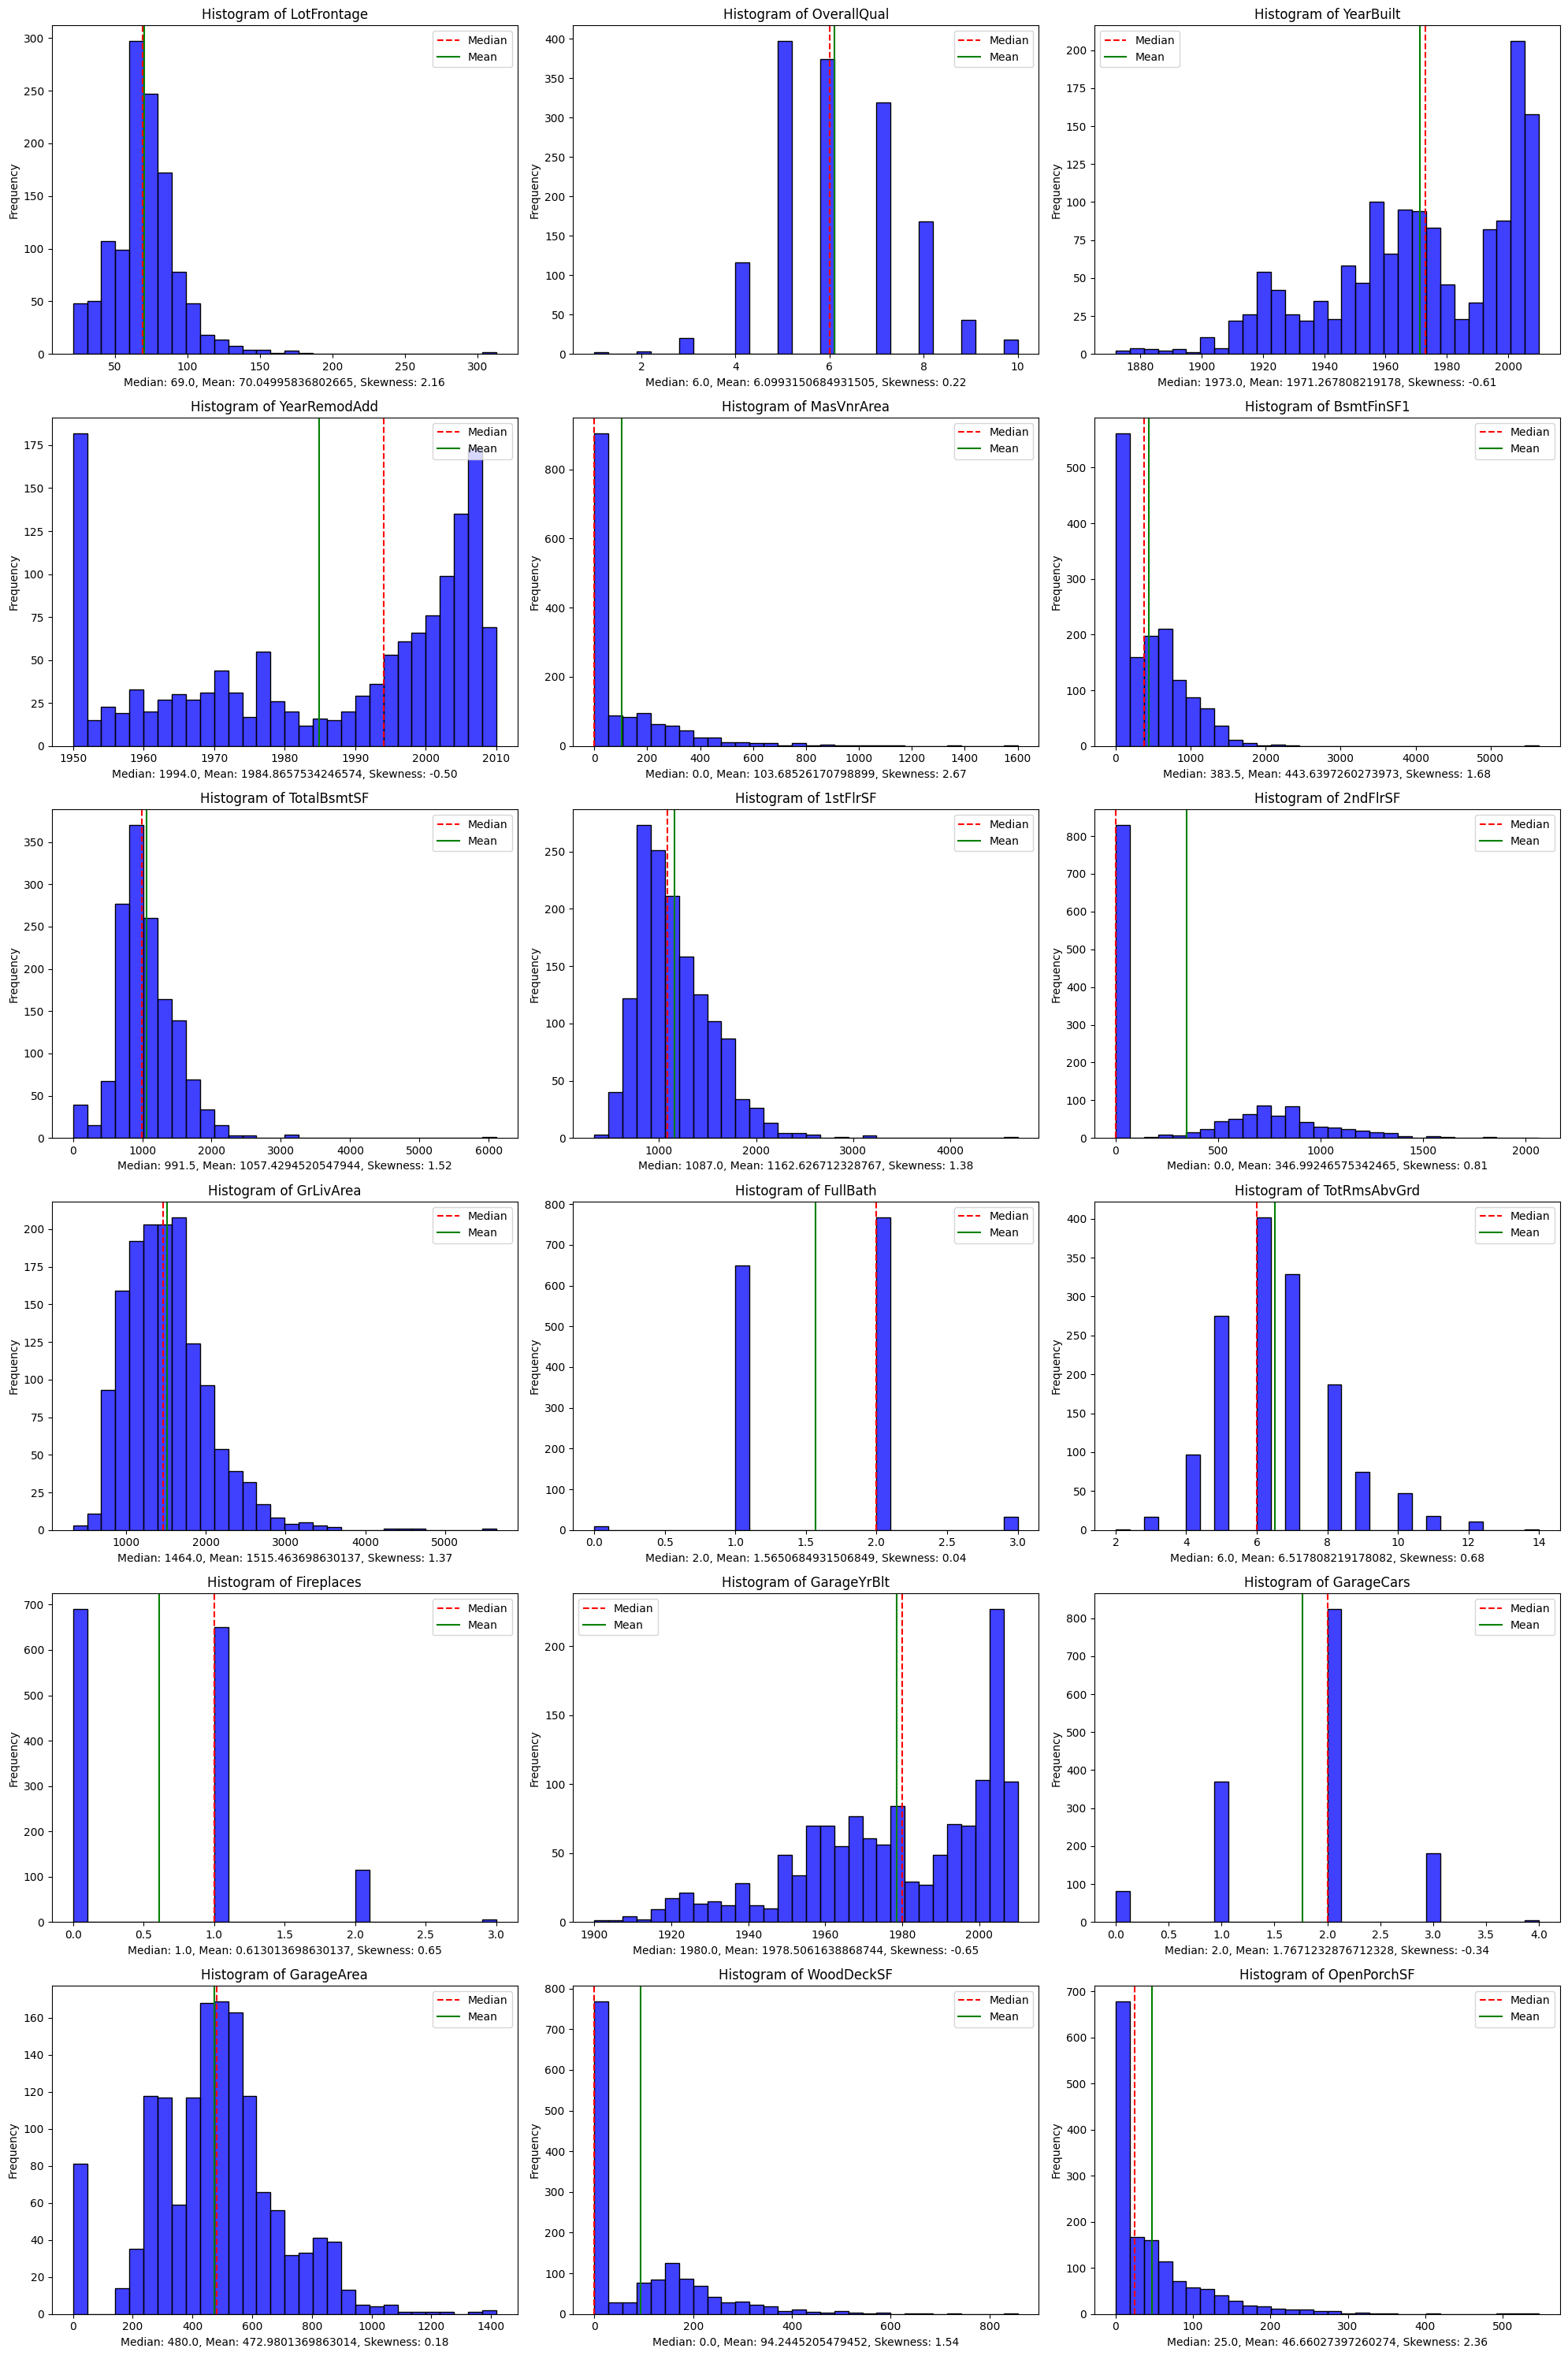

In [49]:
plot_numerical_distributions(df, correlated_vars)

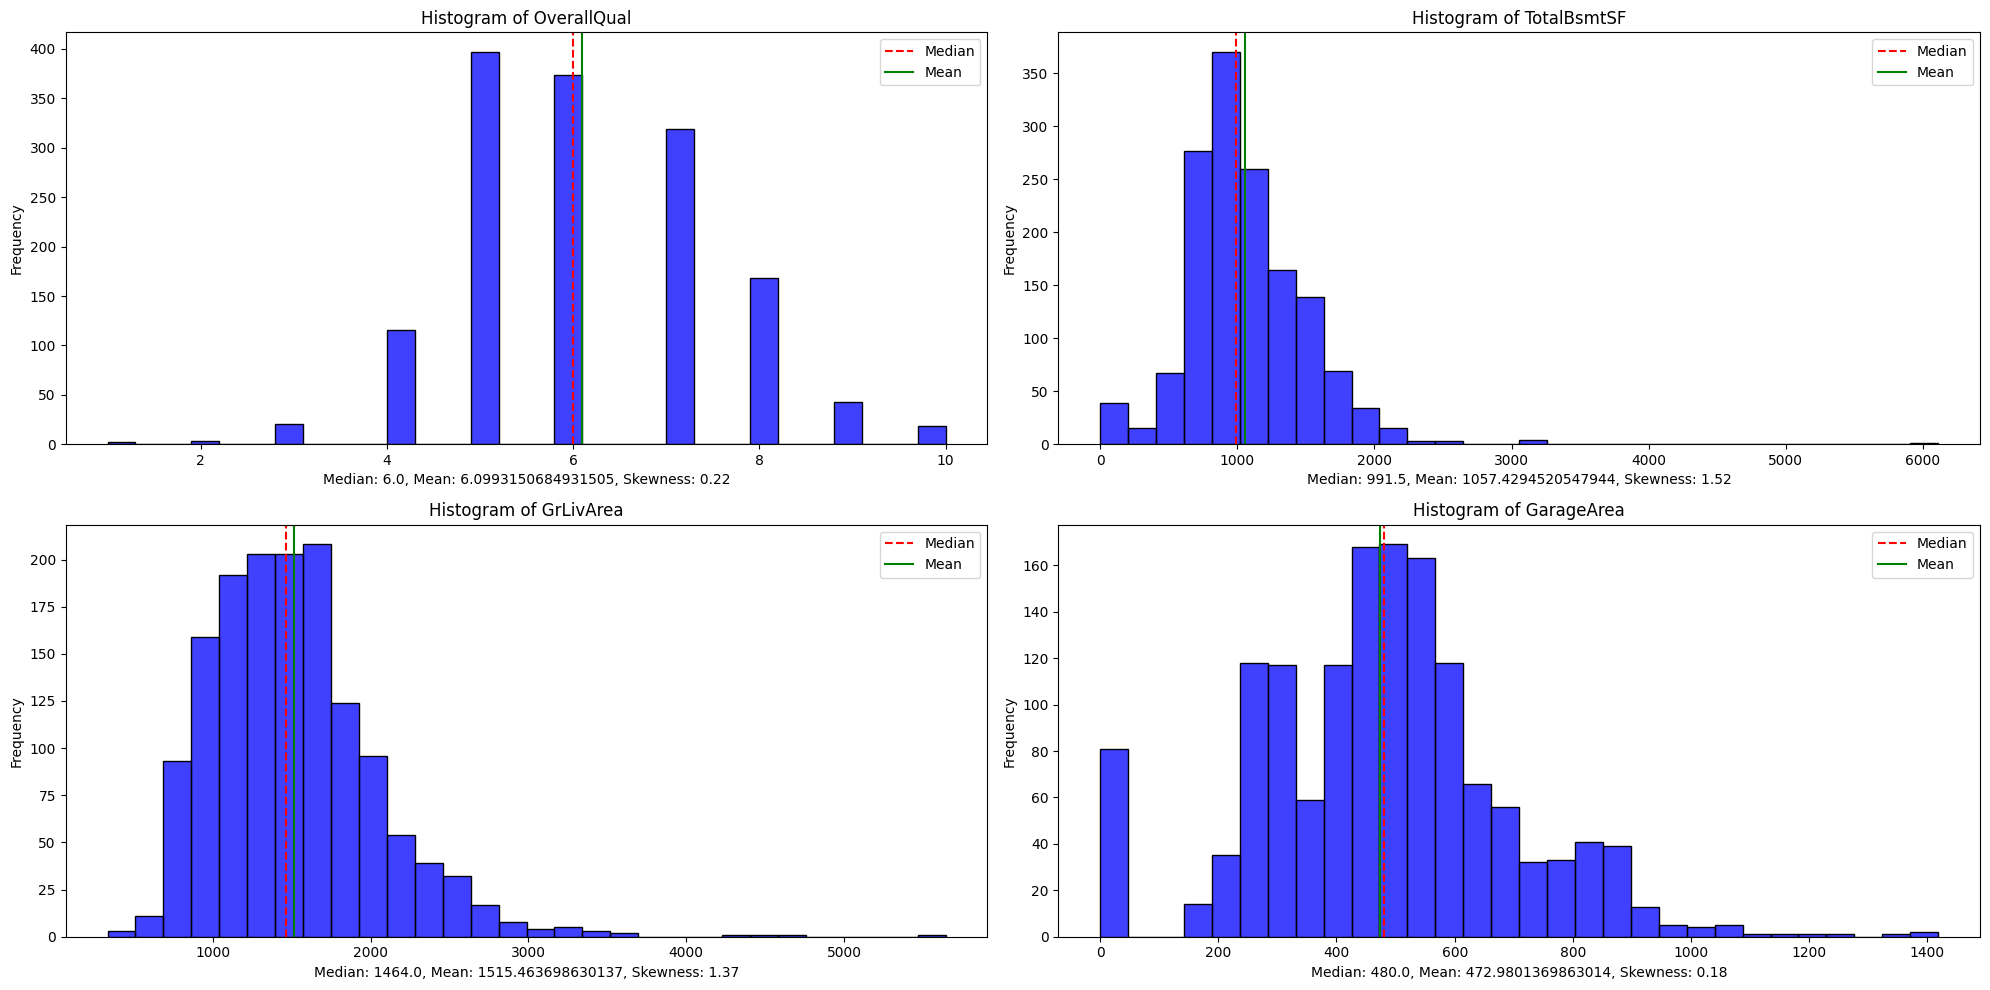

In [50]:
plot_numerical_distributions(df, ['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageArea'], n_cols=2)

In [51]:
def categorical_descriptive_stats(df, categorical_columns):
    # categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

    stats_list = []

    for col in categorical_columns:

        count = df[col].count()

        frequency = df[col].value_counts()

        mode = frequency.idxmax()
        mode_freq = frequency.max()
        mode_pct = (mode_freq / count) * 100

        cardinality = df[col].nunique()

        second_mode = 'N/A'
        second_mode_freq = 'N/A'
        second_mode_pct = 'N/A'
        if len(frequency) > 1 and frequency.iloc[0] != frequency.iloc[1]:
            second_mode = frequency.index[1]
            second_mode_freq = frequency.iloc[1]
            second_mode_pct = (second_mode_freq / count) * 100

        stats_dict = {
            'Feature': col,
            'Count': count,
            '% Miss.': (1 - (count / df.shape[0])) * 100,
            'Card.': cardinality,
            'Mode': mode,
            'Mode Freq.': mode_freq,
            'Mode %': mode_pct,
            '2nd Mode': second_mode,
            '2nd Mode Freq.': second_mode_freq,
            '2nd Mode %': second_mode_pct
        }
        stats_list.append(stats_dict)

    stats_df = pd.DataFrame(stats_list)
    stats_df.set_index('Feature', inplace = True)

    return stats_df

In [52]:
categorical_descriptive_stats(df, significant_categoricals_list).T

Feature,Neighborhood,ExterQual,KitchenQual,BsmtQual,GarageFinish,Foundation,HeatingQC,GarageType,BsmtFinType1,SaleCondition,Exterior1st,Exterior2nd,BsmtExposure,SaleType,MSZoning,HouseStyle,LotShape,CentralAir,FireplaceQu,Electrical,PavedDrive,RoofStyle,MasVnrType,BldgType,BsmtCond,LandContour,Alley,RoofMatl,Condition1,GarageQual,GarageCond,ExterCond,LotConfig,Functional,Heating,Fence,BsmtFinType2,Condition2
Count,1460,1460,1460,1423,1379,1460,1460,1379,1423,1460,1460,1460,1422,1460,1460,1460,1460,1460,770,1459,1460,1460,588,1460,1423,1460,91,1460,1460,1379,1379,1460,1460,1460,1460,281,1422,1460
% Miss.,0.0,0.0,0.0,2.534247,5.547945,0.0,0.0,5.547945,2.534247,0.0,0.0,0.0,2.60274,0.0,0.0,0.0,0.0,0.0,47.260274,0.068493,0.0,0.0,59.726027,0.0,2.534247,0.0,93.767123,0.0,0.0,5.547945,5.547945,0.0,0.0,0.0,0.0,80.753425,2.60274,0.0
Card.,25,4,4,4,3,6,5,6,6,6,15,16,4,9,5,8,4,2,5,5,3,6,3,5,4,4,2,8,9,5,5,5,5,7,6,4,6,8
Mode,NAmes,TA,TA,TA,Unf,PConc,Ex,Attchd,Unf,Normal,VinylSd,VinylSd,No,WD,RL,1Story,Reg,Y,Gd,SBrkr,Y,Gable,BrkFace,1Fam,TA,Lvl,Grvl,CompShg,Norm,TA,TA,TA,Inside,Typ,GasA,MnPrv,Unf,Norm
Mode Freq.,225,906,735,649,605,647,741,870,430,1198,515,504,953,1267,1151,726,925,1365,380,1334,1340,1141,445,1220,1311,1311,50,1434,1260,1311,1326,1282,1052,1360,1428,157,1256,1445
Mode %,15.410959,62.054795,50.342466,45.607871,43.872371,44.315068,50.753425,63.089195,30.21785,82.054795,35.273973,34.520548,67.018284,86.780822,78.835616,49.726027,63.356164,93.493151,49.350649,91.432488,91.780822,78.150685,75.680272,83.561644,92.129304,89.794521,54.945055,98.219178,86.30137,95.068891,96.156635,87.808219,72.054795,93.150685,97.808219,55.871886,88.326301,98.972603
2nd Mode,CollgCr,Gd,Gd,Gd,RFn,CBlock,TA,Detchd,GLQ,Partial,HdBoard,MetalSd,Av,New,RM,2Story,IR1,N,TA,FuseA,N,Hip,Stone,TwnhsE,Gd,Bnk,Pave,Tar&Grv,Feedr,Fa,Fa,Gd,Corner,Min2,GasW,GdPrv,Rec,Feedr
2nd Mode Freq.,150,488,586,618,422,634,428,387,418,125,222,214,221,122,218,445,484,95,313,94,90,286,128,114,65,63,41,11,81,48,35,146,263,34,18,59,54,6
2nd Mode %,10.273973,33.424658,40.136986,43.429375,30.601885,43.424658,29.315068,28.063814,29.374561,8.561644,15.205479,14.657534,15.541491,8.356164,14.931507,30.479452,33.150685,6.506849,40.649351,6.442769,6.164384,19.589041,21.768707,7.808219,4.567814,4.315068,45.054945,0.753425,5.547945,3.480783,2.538071,10.0,18.013699,2.328767,1.232877,20.996441,3.797468,0.410959


In [53]:
def plot_categorical_distributions(df, categorical_columns, filename=None):
    # categorical_columns = df.select_dtypes(include=['object', 'category']).columns

    num_rows = np.ceil(len(categorical_columns) / 3).astype(int)

    plt.figure(figsize=(20, 5 * num_rows))

    for i, col in enumerate(categorical_columns, 1):
        plt.subplot(num_rows, 3, i)
        sns.countplot(x=df[col], color='skyblue')

        mode_val = df[col].mode()[0]

        plt.title(f'Histogram of {col}')
        plt.xlabel(f'Mode: {mode_val}')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)

    plt.tight_layout()

    if filename:
        plt.savefig(filename)
        plt.close()
        return filename
    else:
        plt.show()

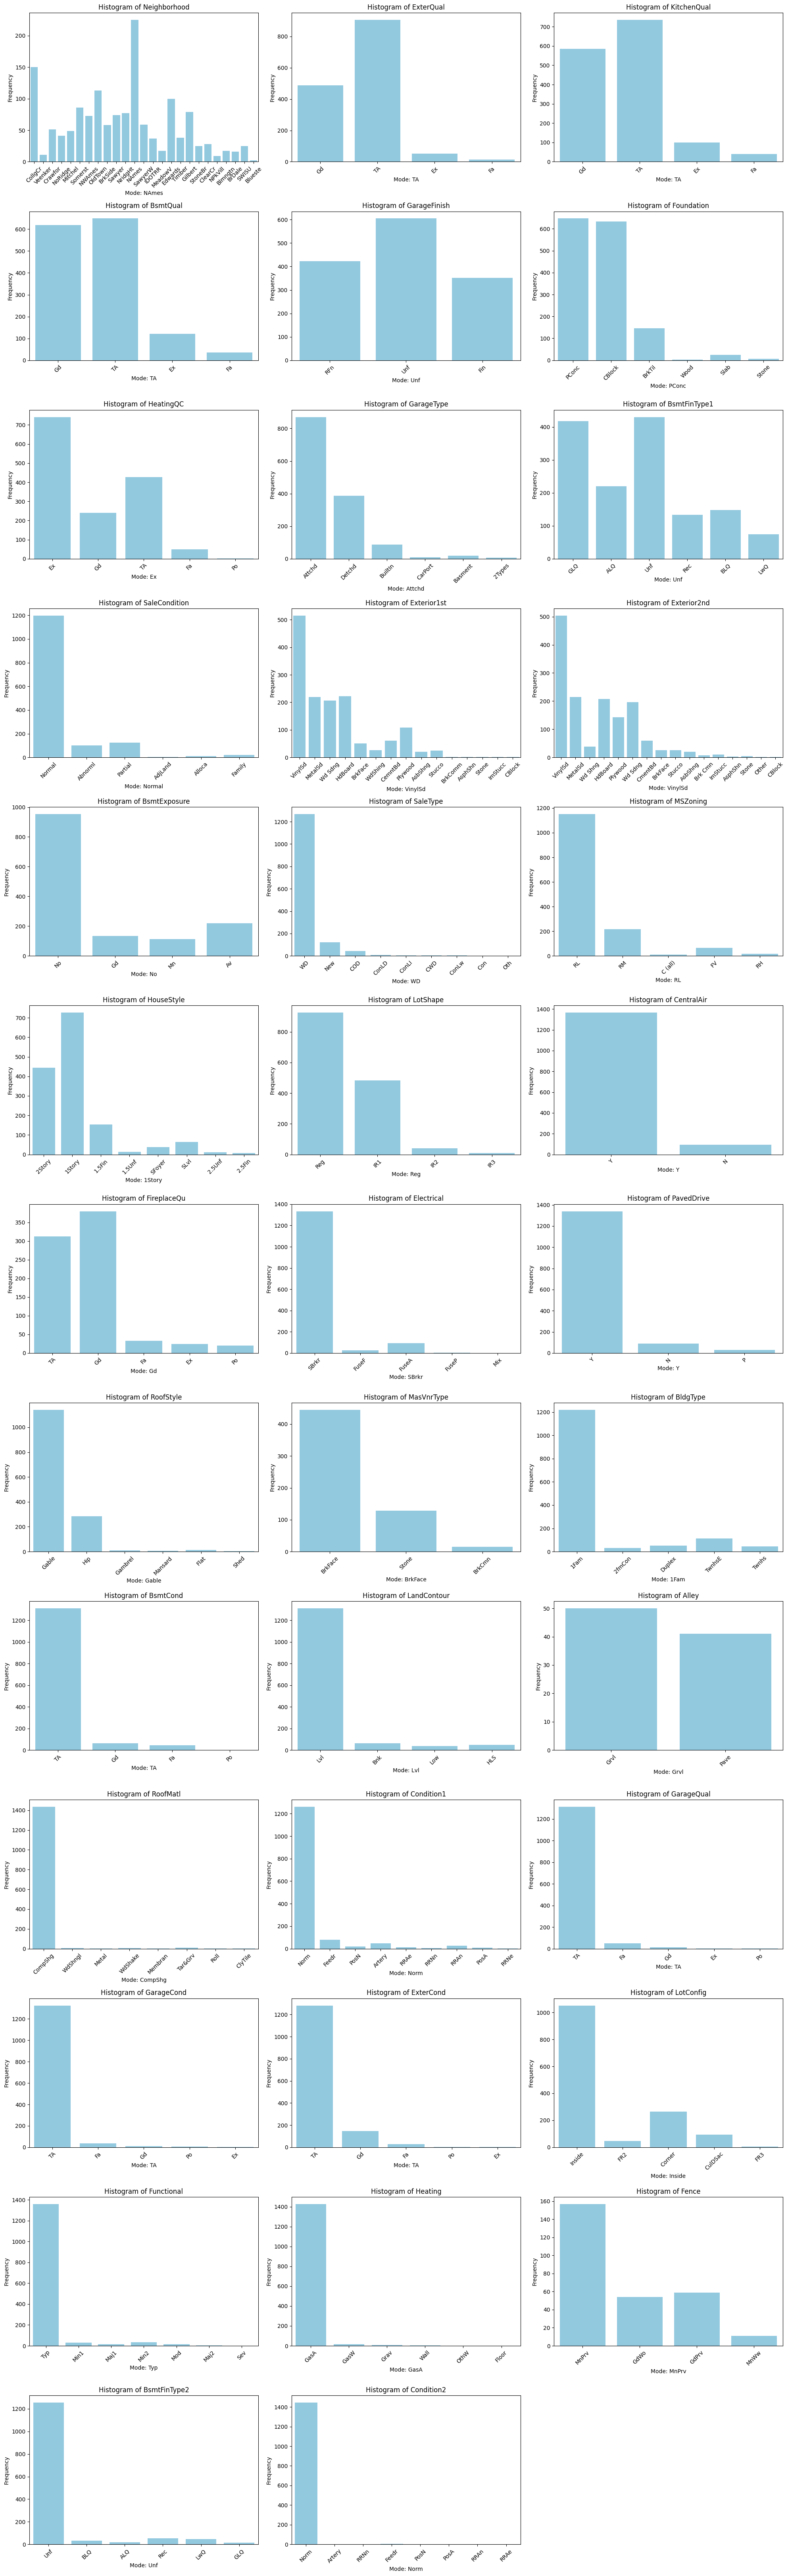

In [54]:
plot_categorical_distributions(df, significant_categoricals_list)

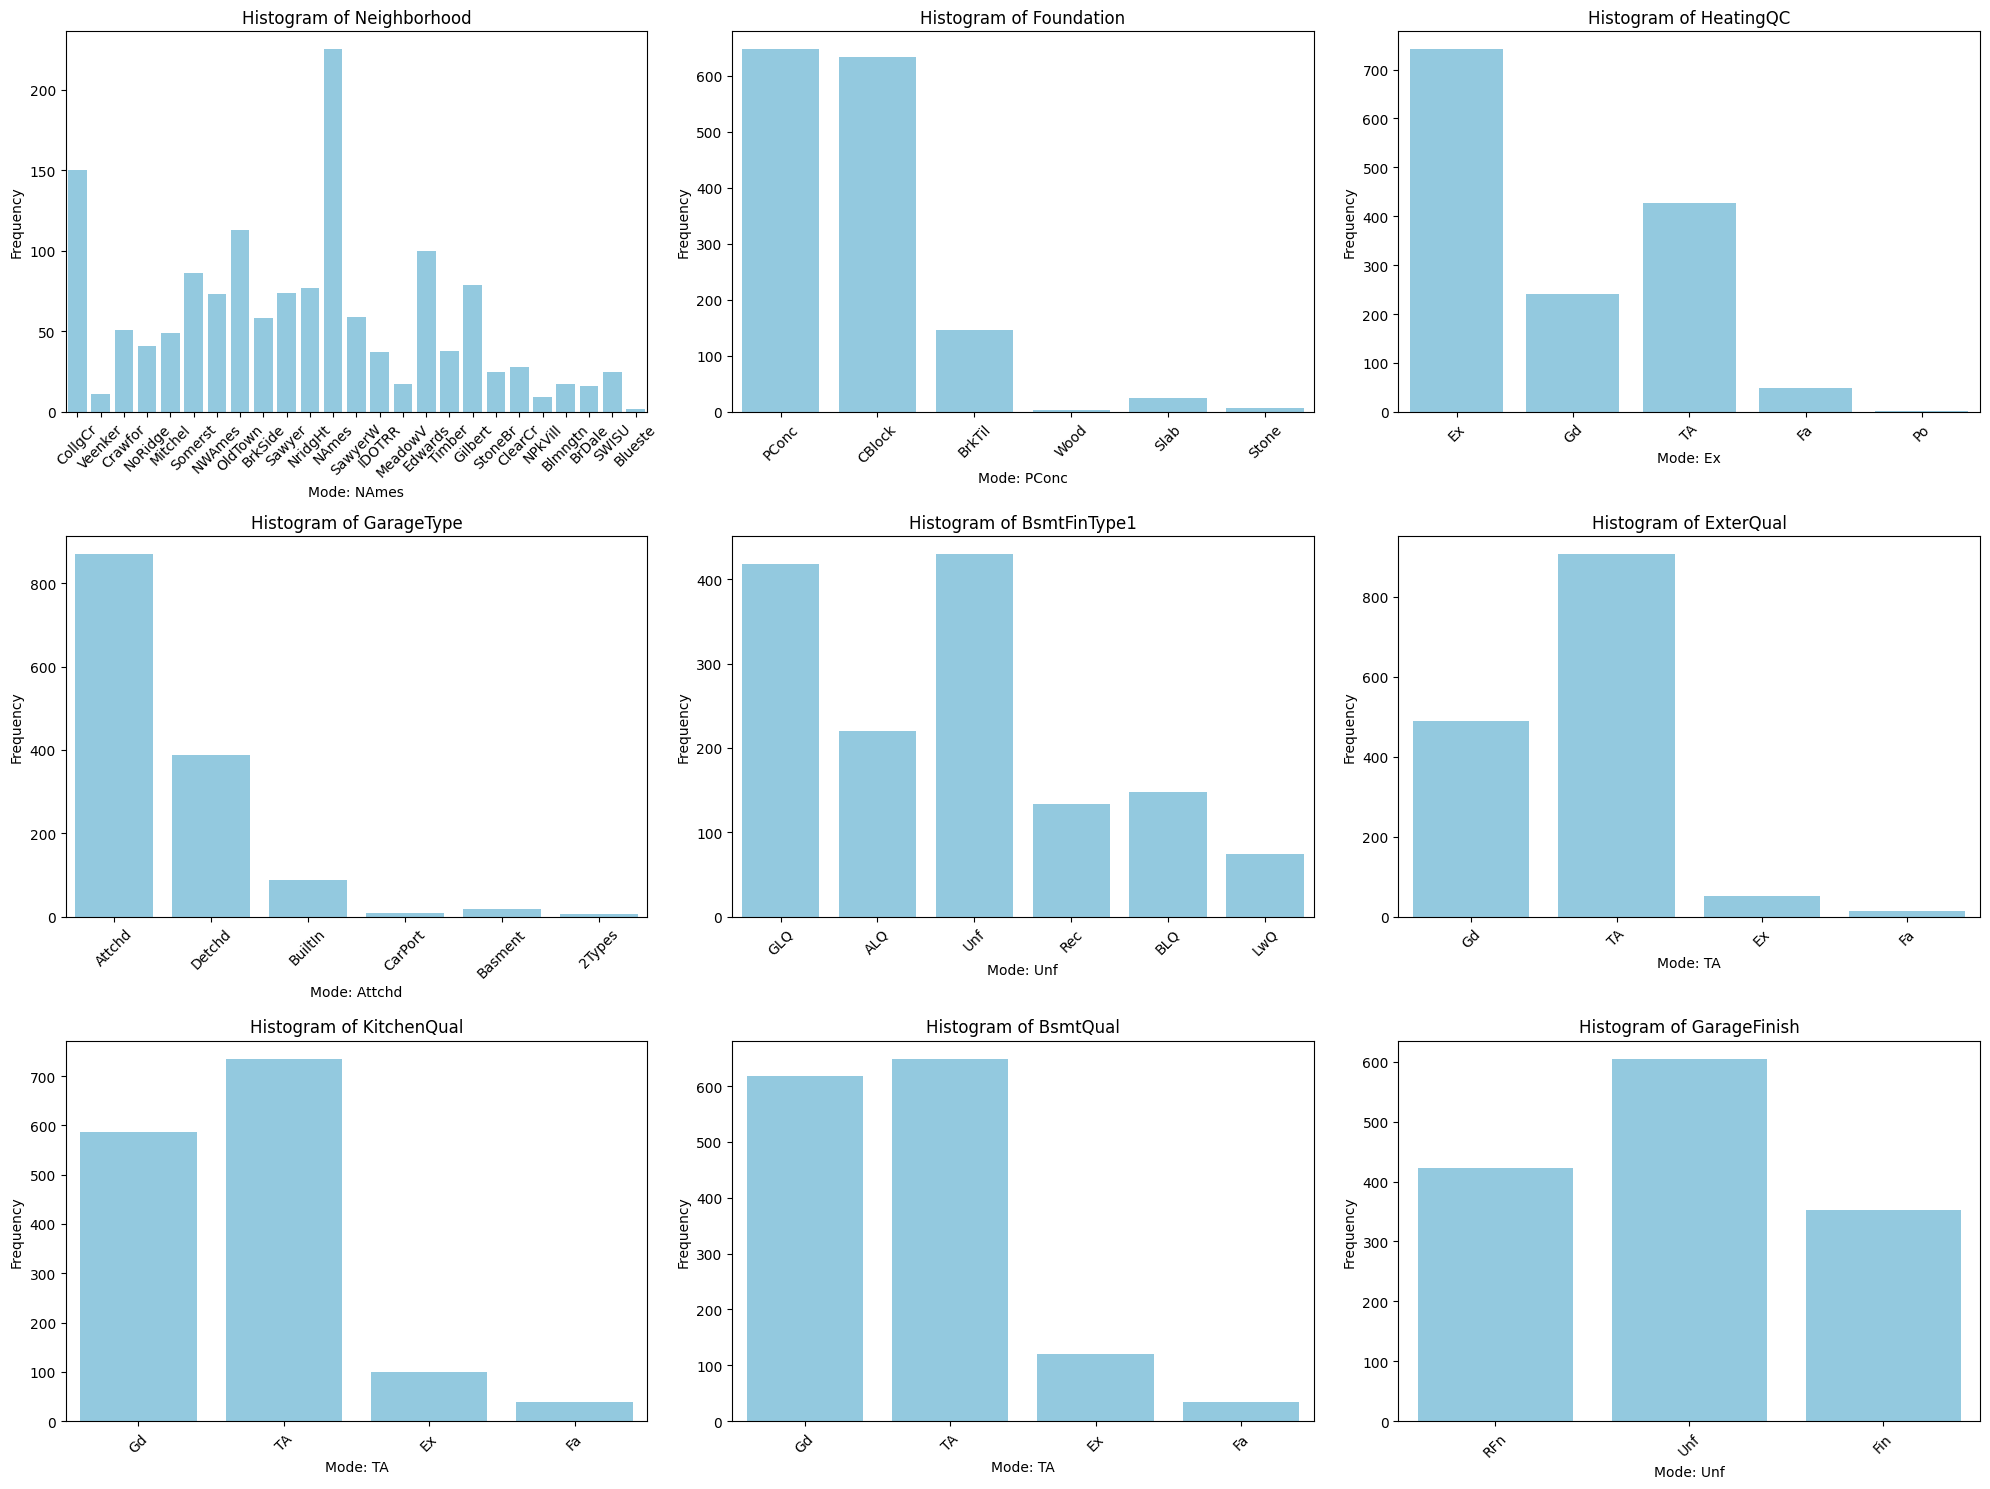

In [55]:
plot_categorical_distributions(df, ['Neighborhood', 'Foundation', 'HeatingQC', 'GarageType', 'BsmtFinType1', 'ExterQual', 'KitchenQual', 'BsmtQual', 'GarageFinish'])

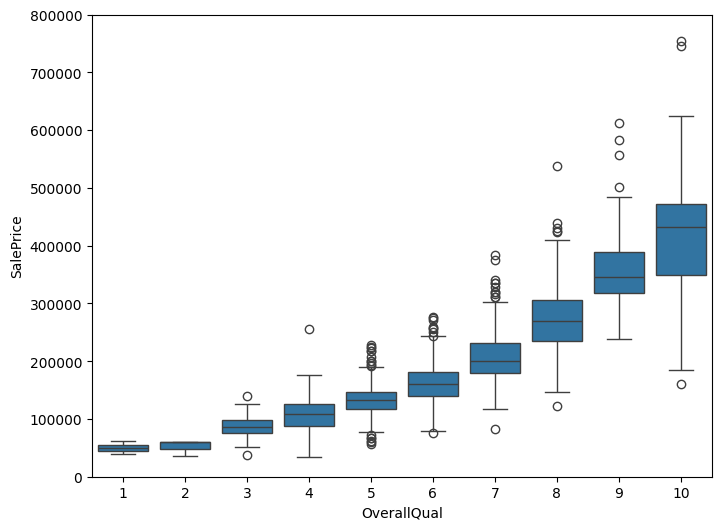

In [56]:
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

### Strsila

In [57]:
def outlier_report(df, numerical_columns):
    outlier_summary = {}

    for column in numerical_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        num_outliers = outliers.shape[0]
        perc_outliers = (num_outliers / df.shape[0]) * 100

        outlier_summary[column] = {'Number of Outliers': num_outliers, 'Percentage': round(perc_outliers, 2)}

    return pd.DataFrame(outlier_summary).T.sort_values(by = 'Percentage', ascending = False)

In [58]:
res_df = outlier_report(df, correlated_vars)
res_df[res_df.Percentage != 0]

,Number of Outliers,Percentage
MasVnrArea,96.0,6.58
LotFrontage,88.0,6.03
OpenPorchSF,77.0,5.27
TotalBsmtSF,61.0,4.18
WoodDeckSF,32.0,2.19
GrLivArea,31.0,2.12
TotRmsAbvGrd,30.0,2.05
GarageArea,21.0,1.44
1stFlrSF,20.0,1.37
BsmtFinSF1,7.0,0.48


### Nedostajuće vrijednosti

In [59]:
pd.set_option('display.max_rows', None)
missing = pd.DataFrame({'Missing': df.isna().sum(), 'Missing %': round(df.isna().sum() / len(df) * 100, 2)})
missing[missing.Missing != 0].sort_values(by = 'Missing %', ascending = False)

,Missing,Missing %
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


## Provjera multikolinearnosti

In [60]:
correlation_matrix = numerical_columns.corr()
correlated_vars = highly_correlated(correlation_matrix, 'SalePrice', .25)
correlated_vars

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

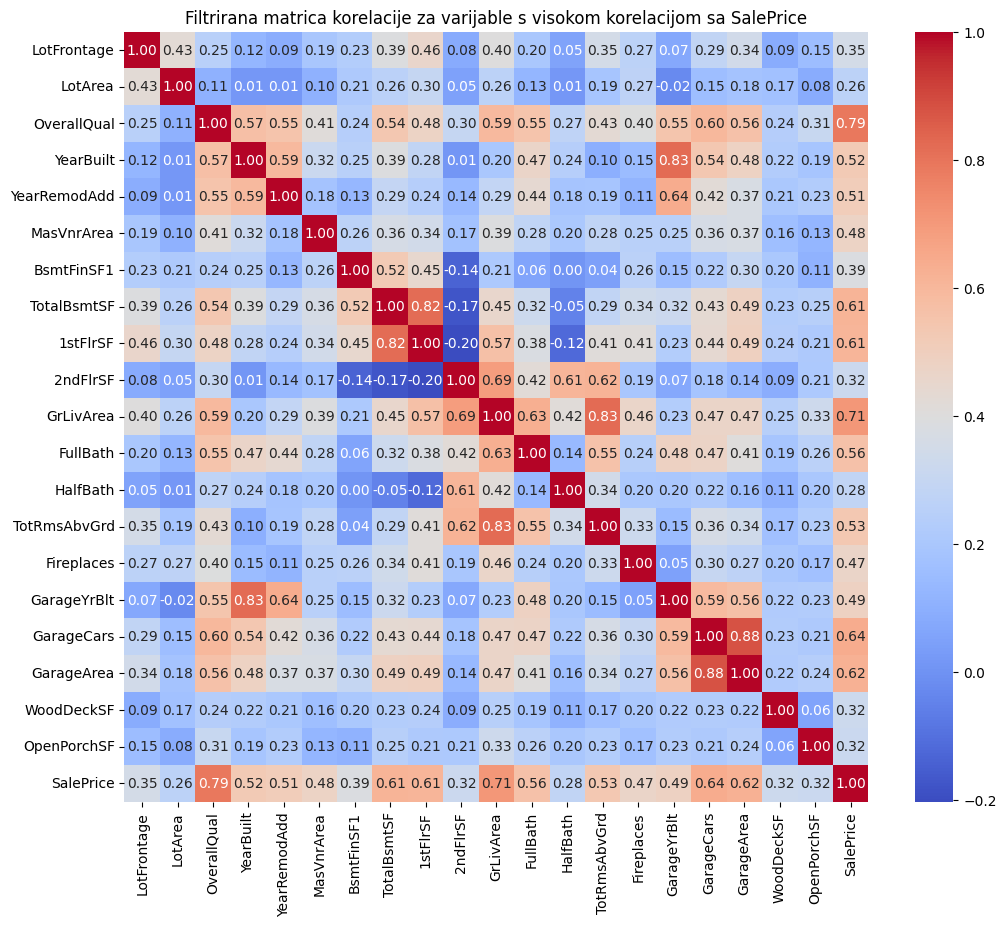

In [61]:
correlated_vars.append('SalePrice')

filtered_correlation_matrix = df[correlated_vars].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(filtered_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Filtrirana matrica korelacije za varijable s visokom korelacijom sa SalePrice')
plt.show()

In [62]:
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix_numeric = numeric_df[correlated_vars].corr()

threshold = 0.75
highly_correlated_pairs = []

for i in range(correlation_matrix_numeric.shape[0]):
    for j in range(i):
        if abs(correlation_matrix_numeric.iloc[i, j]) > threshold:
            pair = (correlation_matrix_numeric.index[i], correlation_matrix_numeric.columns[j])
            highly_correlated_pairs.append(pair)

In [63]:
print(f'Broj parova visokokoreliranih numeričkih značajki: {len(highly_correlated_pairs)}')

Broj parova visokokoreliranih numeričkih značajki: 5


In [64]:
highly_correlated_pairs

[('1stFlrSF', 'TotalBsmtSF'),
 ('TotRmsAbvGrd', 'GrLivArea'),
 ('GarageYrBlt', 'YearBuilt'),
 ('GarageArea', 'GarageCars'),
 ('SalePrice', 'OverallQual')]

In [65]:
def get_min_corrs(pairs, target_variable, corr_mat):
  min_corrs = []

  for pair in pairs:
    if target_variable in pair:
      continue

    corr_first = corr_mat.at[target_variable, pair[0]]
    corr_second = corr_mat.at[target_variable, pair[1]]

    min_corr = pair[0] if corr_first < corr_second else pair[1]
    min_corrs.append(min_corr)

  return min_corrs

In [66]:
columns_to_drop = get_min_corrs(highly_correlated_pairs, 'SalePrice', correlation_matrix_numeric)
columns_to_drop

['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea']

In [67]:
# df.drop(columns_to_drop, axis = 1, inplace = True)

In [68]:
for col in columns_to_drop:
  correlated_vars.remove(col)

correlated_vars

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

In [69]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

In [70]:
target_variable = 'SalePrice'
categorical_vars = significant_categoricals.index.tolist()
# categorical_vars.remove(target_variable)

correlation_matrix_categorical = pd.DataFrame(index=categorical_vars, columns=categorical_vars)

for var1 in categorical_vars:
    for var2 in categorical_vars:
        if var1 != var2:
            correlation_matrix_categorical.loc[var1, var2] = cramers_v(df[var1], df[var2])
        else:
            correlation_matrix_categorical.loc[var1, var2] = 1.0

high_corr_threshold = 0.75
high_corr_vars = []

for var1 in correlation_matrix_categorical.columns:
    for var2 in correlation_matrix_categorical.index:
        if var1 != var2 and correlation_matrix_categorical.loc[var1, var2] > high_corr_threshold:
            if (var1, var2) not in high_corr_vars and (var2, var1) not in high_corr_vars:
              high_corr_vars.append((var1, var2))
              break

<ipython-input-69-7fcef97abb2f>:5: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
<ipython-input-69-7fcef97abb2f>:5: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
<ipython-input-69-7fcef97abb2f>:5: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
<ipython-input-69-7fcef97abb2f>:5: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))


In [71]:
print(f'Broj parova visokokoreliranih kategoričkih značajki: {len(high_corr_vars)}')

Broj parova visokokoreliranih kategoričkih značajki: 2


In [72]:
high_corr_vars

[('Neighborhood', 'Alley'), ('Exterior1st', 'Exterior2nd')]

In [73]:
correlation_matrix_categorical

,Neighborhood,ExterQual,KitchenQual,BsmtQual,GarageFinish,Foundation,HeatingQC,GarageType,BsmtFinType1,SaleCondition,Exterior1st,Exterior2nd,BsmtExposure,SaleType,MSZoning,HouseStyle,LotShape,CentralAir,FireplaceQu,Electrical,PavedDrive,RoofStyle,MasVnrType,BldgType,BsmtCond,LandContour,Alley,RoofMatl,Condition1,GarageQual,GarageCond,ExterCond,LotConfig,Functional,Heating,Fence,BsmtFinType2,Condition2
Neighborhood,1.0,0.501422,0.462022,0.549863,0.491831,0.435848,0.322669,0.339493,0.338284,0.253855,0.314392,0.340828,0.299555,0.212154,0.65248,0.320112,0.275455,0.402972,0.351986,0.220316,0.334641,0.225846,0.431144,0.437404,0.177663,0.381687,0.801963,0.159672,0.224656,0.215201,0.184351,0.199462,0.187407,0.152535,0.139032,0.287812,0.203594,0.128621
ExterQual,0.501422,1.0,0.547358,0.463358,0.384475,0.375343,0.327545,0.281923,0.29757,0.242605,0.363707,0.369084,0.161798,0.270226,0.244854,0.189271,0.120708,0.281909,0.218601,0.147909,0.197807,0.157173,0.254393,0.183073,0.168757,0.141208,0.601124,0.095602,0.145141,0.071172,0.07616,0.188898,0.054254,0.120446,0.072283,0.137793,0.109906,0.153514
KitchenQual,0.462022,0.547358,1.0,0.421443,0.351662,0.347604,0.322307,0.229063,0.282145,0.219302,0.305906,0.301552,0.142926,0.221646,0.181886,0.162087,0.102786,0.345546,0.238492,0.208102,0.19645,0.125555,0.267605,0.158246,0.131245,0.106958,0.490987,0.079039,0.111001,0.125531,0.12451,0.184954,0.050826,0.106681,0.165253,0.179666,0.081193,0.113482
BsmtQual,0.549863,0.463358,0.421443,1.0,0.412359,0.408405,0.276301,0.272136,0.337999,0.252403,0.337068,0.331565,0.200192,0.255519,0.198463,0.223461,0.143666,0.218895,0.265701,0.224423,0.182706,0.176692,0.290498,0.171232,0.198149,0.104398,0.542992,0.080476,0.168308,0.184645,0.168212,0.122675,0.10115,0.125477,0.053063,0.148163,0.116567,0.1299
GarageFinish,0.491831,0.384475,0.351662,0.412359,1.0,0.380277,0.292587,0.456514,0.265285,0.198665,0.346242,0.351028,0.182171,0.201677,0.230866,0.250386,0.175501,0.246182,0.136786,0.178477,0.155409,0.125214,0.160659,0.192134,0.114773,0.13114,0.556863,0.072455,0.159617,0.155955,0.14082,0.114067,0.064623,0.107249,0.096307,0.143286,0.074021,0.074474
Foundation,0.435848,0.375343,0.347604,0.408405,0.380277,1.0,0.297939,0.244069,0.320015,0.167976,0.32898,0.329411,0.138658,0.166694,0.230856,0.226438,0.130324,0.369546,0.157837,0.190781,0.243135,0.108759,0.246189,0.197064,0.147527,0.116179,0.561003,0.048983,0.109041,0.21931,0.152378,0.136013,0.072309,0.119548,0.223712,0.136837,0.137514,0.077712
HeatingQC,0.322669,0.327545,0.322307,0.276301,0.292587,0.297939,1.0,0.160299,0.210449,0.159953,0.28282,0.283778,0.096673,0.150863,0.12812,0.181574,0.074357,0.382151,0.156118,0.153249,0.182343,0.046468,0.230182,0.123302,0.105952,0.075167,0.367775,0.056533,0.173444,0.088218,0.092847,0.081046,0.053269,0.068119,0.245328,0.105702,0.098166,0.097574
GarageType,0.339493,0.281923,0.229063,0.272136,0.456514,0.244069,0.160299,1.0,0.169435,0.13074,0.22968,0.239266,0.150775,0.119582,0.220878,0.230043,0.151499,0.309275,0.128204,0.130493,0.207296,0.090193,0.271539,0.168027,0.103728,0.131437,0.205101,0.065509,0.119279,0.133148,0.135486,0.089171,0.081906,0.167249,0.090769,0.213126,0.08253,0.128508
BsmtFinType1,0.338284,0.29757,0.282145,0.337999,0.265285,0.320015,0.210449,0.169435,1.0,0.117146,0.235972,0.245087,0.207081,0.127651,0.147954,0.17522,0.078446,0.18477,0.182486,0.116231,0.183824,0.081213,0.270091,0.115386,0.117892,0.106363,0.324009,0.084626,0.088048,0.098173,0.09615,0.084927,0.08371,0.115354,0.08733,0.17777,0.220475,0.074562
SaleCondition,0.253855,0.242605,0.219302,0.252403,0.198665,0.167976,0.159953,0.13074,0.117146,1.0,0.199007,0.192715,0.115815,0.475809,0.147952,0.110063,0.058572,0.127071,0.161941,0.169629,0.120764,0.105705,0.300914,0.163776,0.091685,0.122025,0.375107,0.089356,0.067866,0.062647,0.066831,0.077843,0.067732,0.070108,0.03432,0.073661,0.05893,0.063888


In [74]:
categorical_vars = significant_categoricals.index.tolist()
numerical_vars = correlated_vars

In [75]:
for pair in high_corr_vars:
 categorical_vars.remove(pair[1])

In [76]:
df = pd.concat([df[numerical_vars], df[categorical_vars]], axis=1)

In [77]:
len(df.columns)

53

### Nedostajuće vrijednosti

In [78]:
pd.set_option('display.max_rows', None)
missing = pd.DataFrame({'Total': df.isna().sum(), 'Missing %': round(df.isna().sum() / len(df) * 100, 2)})
missing[missing.Total != 0].sort_values(by = 'Missing %', ascending = False)

,Total,Missing %
Fence,1179,80.75
MasVnrType,872,59.73
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageQual,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55
GarageCond,81,5.55
BsmtFinType2,38,2.60
BsmtExposure,38,2.60


Let's analyse this to understand how to handle the missing data.

We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete. The point is: will we miss this data? I don't think so. None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house (maybe that's the reason why data is missing?). Moreover, looking closer at the variables, we could say that variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' are strong candidates for outliers, so we'll be happy to delete them.

In what concerns the remaining cases, we can see that 'GarageX' variables have the same number of missing data. I bet missing data refers to the same set of observations (although I will not check it; it's just 5% and we should not spend 20 in5
  problems). Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data, I'll delete the mentioned 'GarageX' variables. The same logic applies to 'BsmtX' variables.

Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.

Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.

In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.

In [79]:
df = df.drop((missing[missing['Total'] > 1]).index, axis = 1)
df = df.drop(df.loc[df['Electrical'].isnull()].index)

In [80]:
df.isna().sum().max()

0

### Stršila

In [81]:
def create_boxplots(df, exclude_col='day_of_week', export_png=False, filename='boxplot.png'):
    if exclude_col in df.columns:
        numeric_cols = df.drop(columns=[exclude_col]).select_dtypes(include=[np.number])
    else:
        numeric_cols = df.select_dtypes(include=[np.number])

    num_cols = numeric_cols.shape[1]

    num_rows = (num_cols + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.ravel()

    for i, col in enumerate(numeric_cols.columns):
        Q1 = numeric_cols[col].quantile(0.25)
        Q3 = numeric_cols[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = numeric_cols[col][(numeric_cols[col] < lower_bound) | (numeric_cols[col] > upper_bound)]

        axes[i].boxplot(numeric_cols[col].dropna(), vert=True, patch_artist=True)
        axes[i].set_title(col)
        axes[i].set_xlabel(f'Outliers: {len(outliers)}')

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()

    if export_png:
        plt.savefig(filename)
        plt.close()
        return filename

    plt.show()

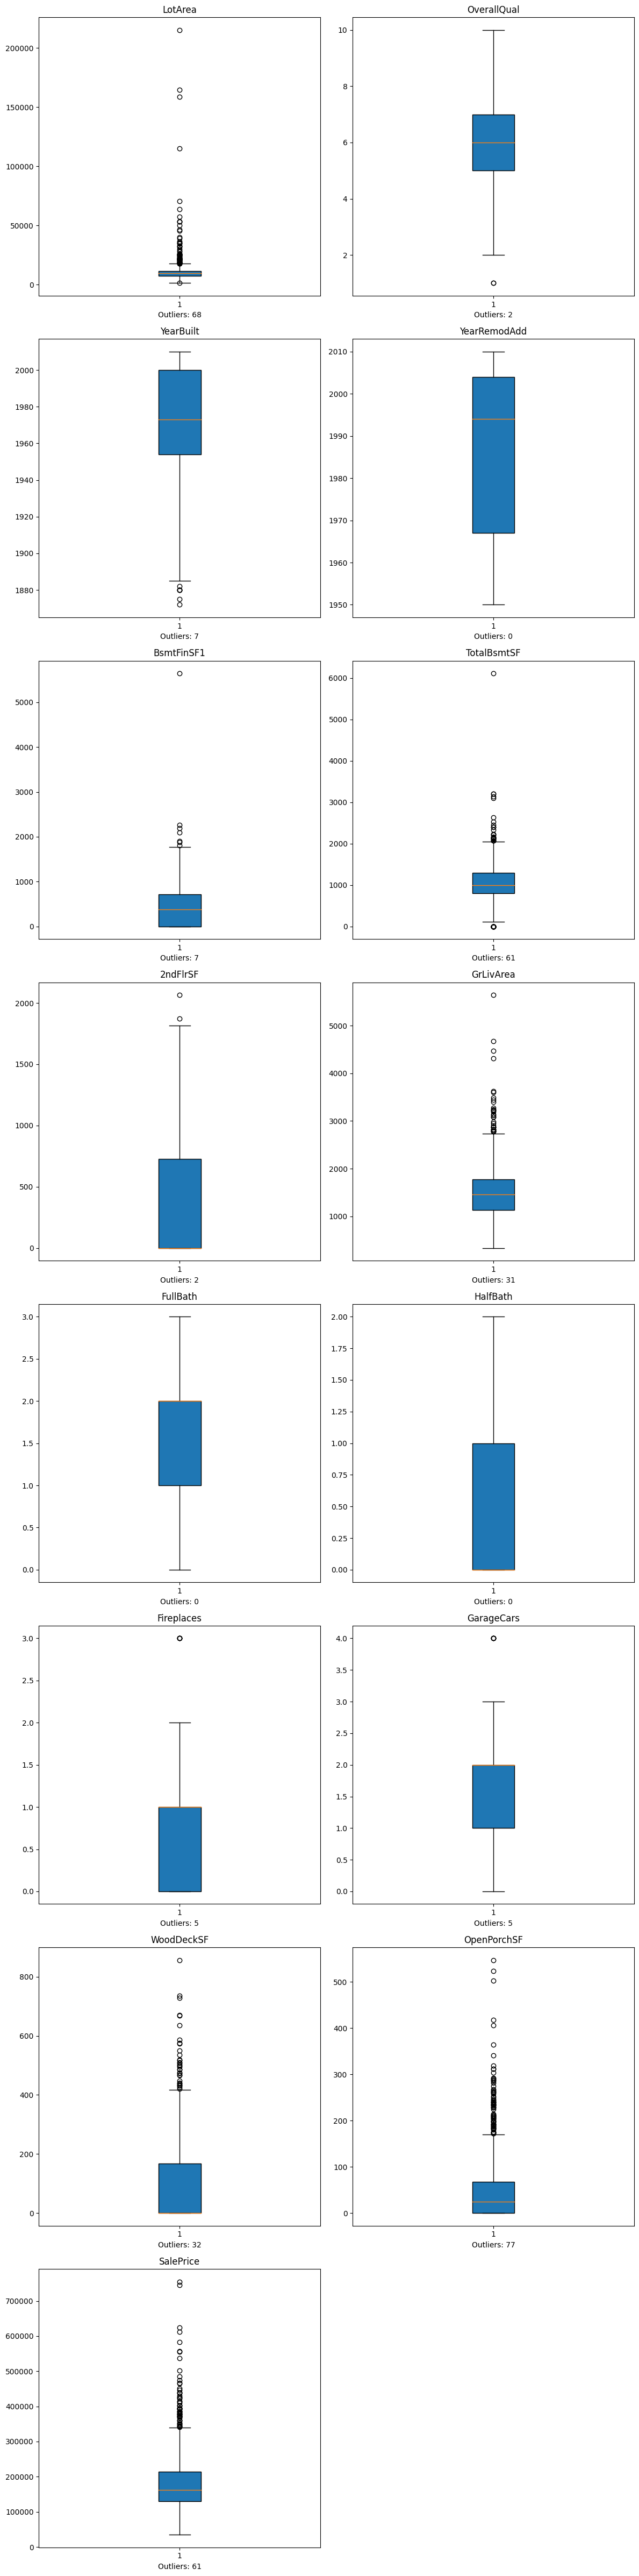

In [82]:
create_boxplots(df)

In [83]:
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [84]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
outliers_dict = {col: identify_outliers(df, col) for col in numeric_columns}

outliers_summary = {col: len(outliers_dict[col]) for col in numeric_columns}
outliers_summary

{'LotArea': 68,
 'OverallQual': 2,
 'YearBuilt': 7,
 'YearRemodAdd': 0,
 'BsmtFinSF1': 7,
 'TotalBsmtSF': 61,
 '2ndFlrSF': 2,
 'GrLivArea': 31,
 'FullBath': 0,
 'HalfBath': 0,
 'Fireplaces': 5,
 'GarageCars': 5,
 'WoodDeckSF': 32,
 'OpenPorchSF': 77,
 'SalePrice': 61}

## Transformacije varijabli i dodatno uklanjanje stršila

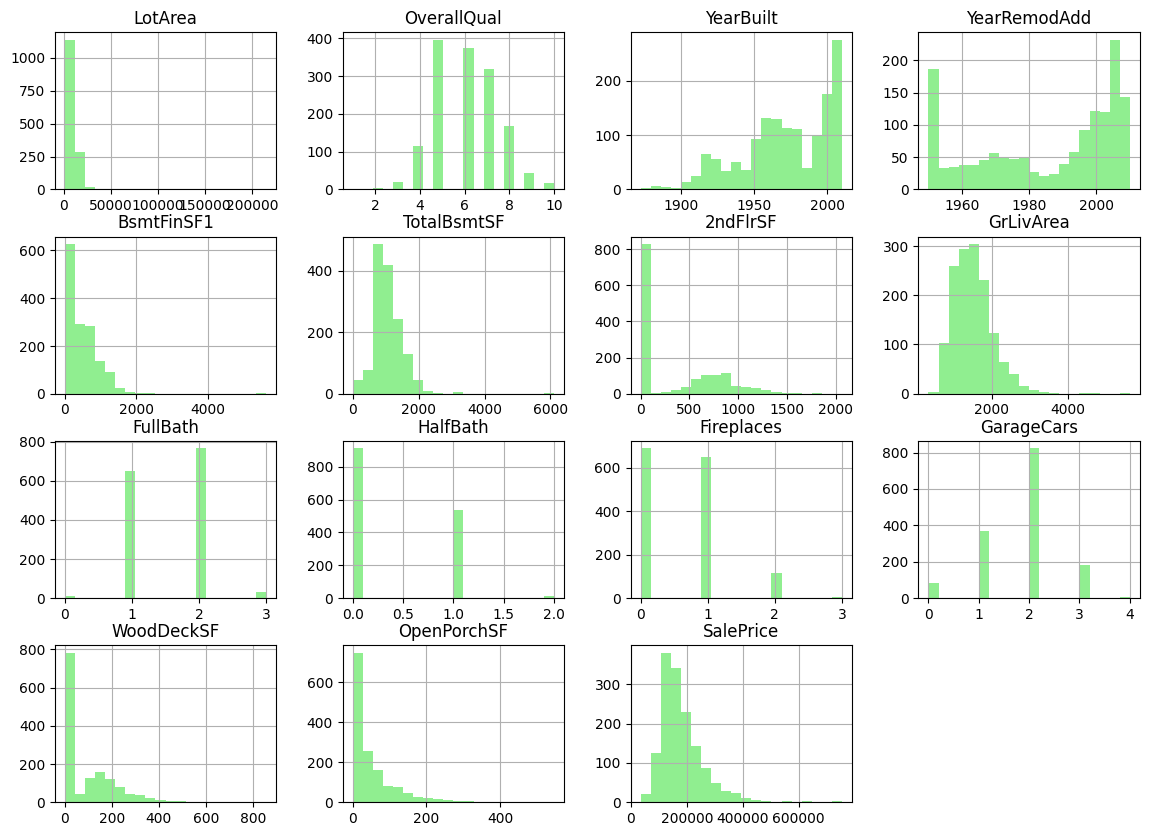

In [85]:
df.hist(bins=20, figsize=(14,10), color='lightgreen')
plt.show()

In [86]:
# df_log_transformed = df.copy()

df['BsmtFinSF1'] = np.log(df['BsmtFinSF1'] + 1)
df['GrLivArea'] = np.log(df['GrLivArea'] + 1)
df['WoodDeckSF'] = np.log(df['WoodDeckSF'] + 1)
df['OpenPorchSF'] = np.log(df['OpenPorchSF'] + 1)
df['SalePrice'] = np.log(df['SalePrice'] + 1)

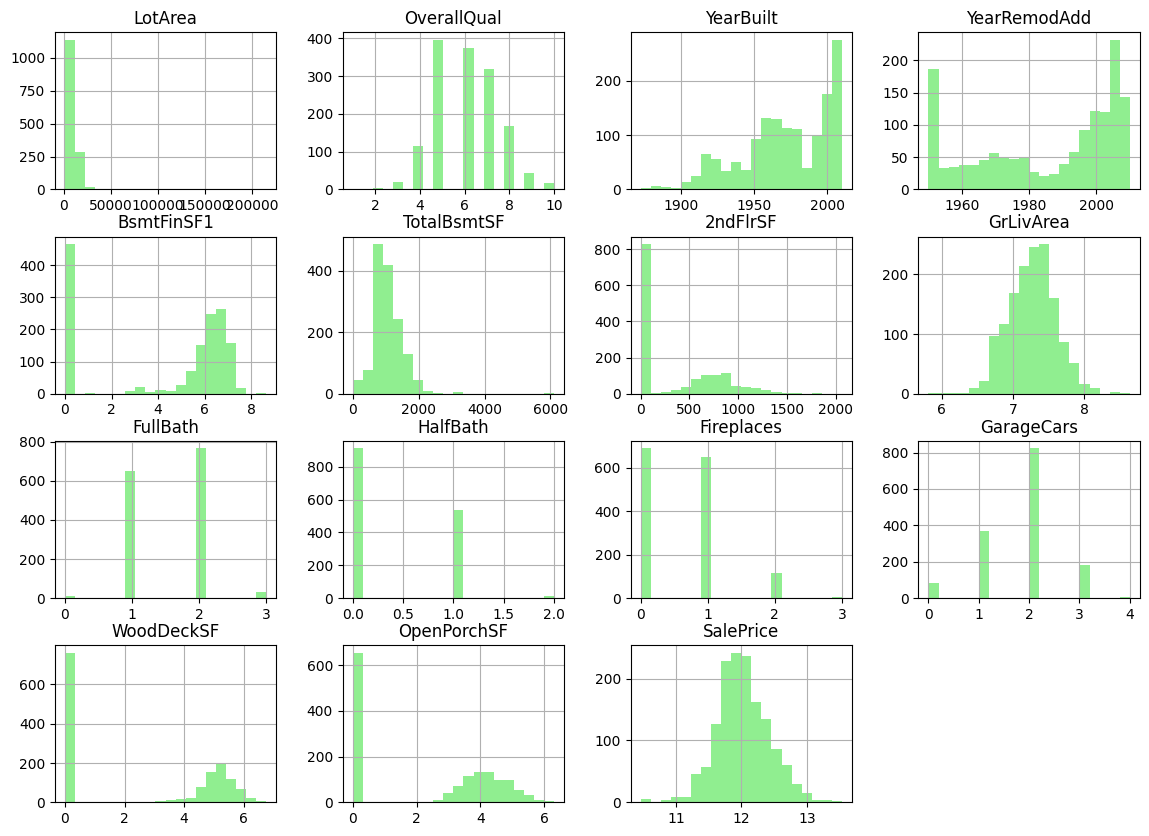

In [87]:
df.hist(bins=20, figsize=(14,10), color='lightgreen')
plt.show()

In [88]:
df['HasBsmt'] = pd.Series(len(df['TotalBsmtSF']), index=df.index)
df['HasBsmt'] = 0
df.loc[df['TotalBsmtSF']>0,'HasBsmt'] = 1

In [89]:
df.loc[df['HasBsmt']==1,'TotalBsmtSF'] = np.log(df['TotalBsmtSF'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<ipython-input-90-8faac1750e3e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);


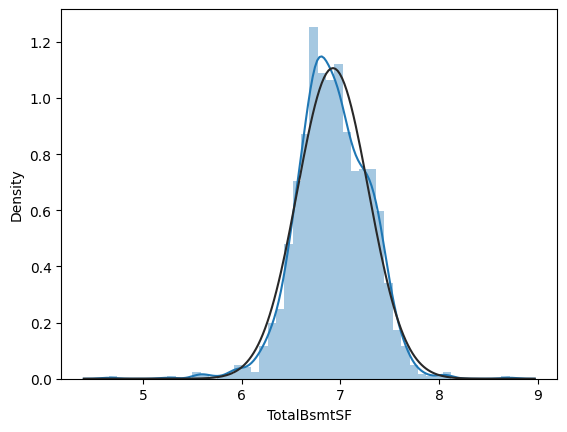

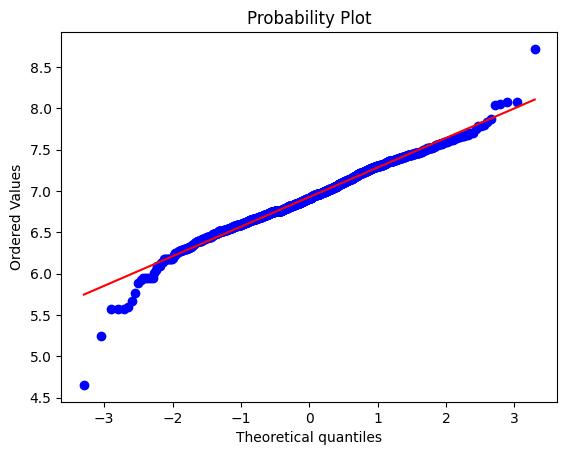

In [90]:
sns.distplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

Ok, now we are dealing with the big boss. What do we have here?

Something that, in general, presents skewness.
A significant number of observations with value zero (houses without basement).
A big problem because the value zero doesn't allow us to do log transformations.
To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

I'm not sure if this approach is correct. It just seemed right to me. That's what I call 'high risk engineering'.

In [91]:
df.drop('HasBsmt', axis = 1, inplace = True)

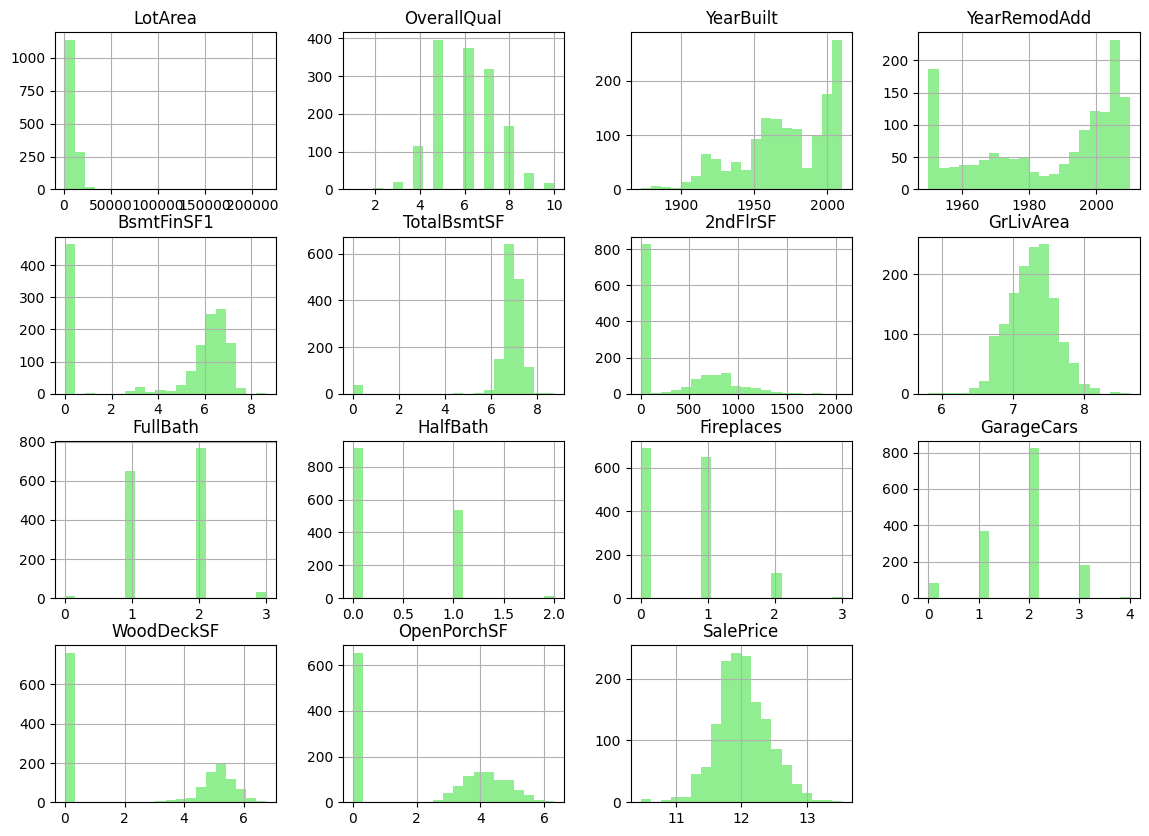

In [92]:
df.hist(bins=20, figsize=(14,10), color='lightgreen')
plt.show()

In [93]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
outliers_dict = {col: identify_outliers(df, col) for col in numeric_columns}

outliers_summary = {col: len(outliers_dict[col]) for col in numeric_columns}
outliers_summary

{'LotArea': 68,
 'OverallQual': 2,
 'YearBuilt': 7,
 'YearRemodAdd': 0,
 'BsmtFinSF1': 0,
 'TotalBsmtSF': 52,
 '2ndFlrSF': 2,
 'GrLivArea': 10,
 'FullBath': 0,
 'HalfBath': 0,
 'Fireplaces': 5,
 'GarageCars': 5,
 'WoodDeckSF': 0,
 'OpenPorchSF': 0,
 'SalePrice': 28}

In [94]:
def winsorize_series(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    series = series.apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return series

In [95]:
cols_with_outliers = [k for k, v in outliers_summary.items() if v > 0]

for col in cols_with_outliers:
    df[col] = winsorize_series(df[col])

In [96]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
outliers_dict = {col: identify_outliers(df, col) for col in numeric_columns}

outliers_summary = {col: len(outliers_dict[col]) for col in numeric_columns}
outliers_summary

{'LotArea': 0,
 'OverallQual': 0,
 'YearBuilt': 0,
 'YearRemodAdd': 0,
 'BsmtFinSF1': 0,
 'TotalBsmtSF': 0,
 '2ndFlrSF': 0,
 'GrLivArea': 0,
 'FullBath': 0,
 'HalfBath': 0,
 'Fireplaces': 0,
 'GarageCars': 0,
 'WoodDeckSF': 0,
 'OpenPorchSF': 0,
 'SalePrice': 0}

### One-hot kodiranje kategoričkih varijabli

In [97]:
df = pd.get_dummies(df)

In [129]:
df.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,PavedDrive_N,PavedDrive_P,PavedDrive_Y,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn
0,8450.0,7.0,2003.0,2003,6.561031,6.752270,854.0,7.444833,2,1,0.0,2.0,0.000000,4.127134,12.247699,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False
1,9600.0,6.0,1976.0,1976,6.886532,7.140453,0.0,7.141245

In [130]:
df.shape

(1459, 179)

### Skaliranje i optimizacija modela

In [151]:
X, y = df.drop('SalePrice', axis=1), df.SalePrice

In [152]:
X.shape

(1459, 178)

In [153]:
y.shape

(1459,)

In [154]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [155]:
X_train_val.shape, X_val.shape, X_test.shape

((1167, 178), (292, 178), (292, 178))

In [156]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove('SalePrice')

In [157]:
numeric_columns

['LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF']

In [158]:
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_val[numeric_columns] = scaler.transform(X_val[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_val = y_scaler.transform(y_val.values.reshape(-1, 1)).flatten()
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).flatten()

In [159]:
X_train = X_train.to_numpy(dtype=np.float32)
X_val = X_val.to_numpy(dtype=np.float32)
X_test = X_test.to_numpy(dtype=np.float32)

y_train = np.array(y_train, dtype=np.float32)
y_val = np.array(y_val, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

In [160]:
def r_squared(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res / (SS_tot + tf.keras.backend.epsilon())

In [168]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.35),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear')
])

model.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=[MeanSquaredError(), MeanAbsoluteError(), r_squared]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                11456     
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 13569 (53.00 KB)
Trainable params: 13569 (53.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [169]:
# dir struktura za spremanje modela
!mkdir training_1
!touch training_1/cp.ckpt

mkdir: cannot create directory ‘training_1’: File exists


In [170]:
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1
)

checkpoint_path = "training_1/cp.ckpt"

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    verbose=1,
    save_best_only=True,
)

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping_callback, model_checkpoint_callback]
)

Epoch 1/100
28/28 [==============================] - ETA: 0s - loss: 0.6194 - mean_squared_error: 0.6194 - mean_absolute_error: 0.6139 - r_squared: 0.3418
Epoch 1: val_loss improved from inf to 0.23960, saving model to training_1/cp.ckpt
28/28 [==============================] - 2s 12ms/step - loss: 0.6194 - mean_squared_error: 0.6194 - mean_absolute_error: 0.6139 - r_squared: 0.3418 - val_loss: 0.2396 - val_mean_squared_error: 0.2396 - val_mean_absolute_error: 0.3707 - val_r_squared: 0.7578
Epoch 2/100
17/28 [=================>............] - ETA: 0s - loss: 0.3721 - mean_squared_error: 0.3721 - mean_absolute_error: 0.4650 - r_squared: 0.6087
Epoch 2: val_loss improved from 0.23960 to 0.21680, saving model to training_1/cp.ckpt
28/28 [==============================] - 0s 6ms/step - loss: 0.3466 - mean_squared_error: 0.3466 - mean_absolute_error: 0.4519 - r_squared: 0.6228 - val_loss: 0.2168 - val_mean_squared_error: 0.2168 - val_mean_absolute_error: 0.3401 - val_r_squared: 0.7817
Epoch

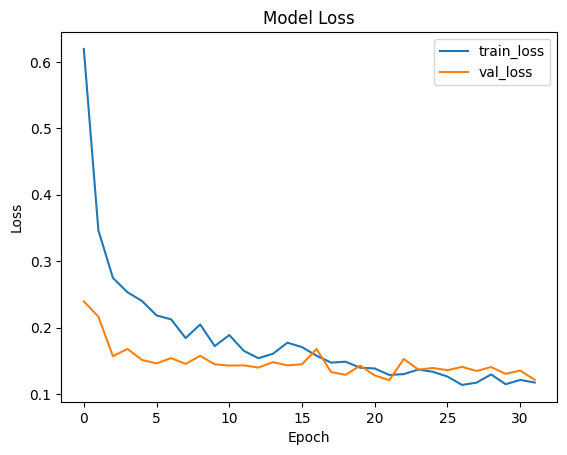

In [171]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Korištenje i evaluacija spremljenog modela

In [ ]:
model_best = tf.keras.Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.35),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

model_best.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_best.load_weights(checkpoint_path)

In [ ]:
model_best.evaluate(X_test, y_test)